# CatBoost

* **kategorik değişken desteği sağlar ve otomatik olarak mücadele eder.**
* **Hızlı tahmin**
* **Başarılı tahmin**
* **GBM türü**

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression  #lojistic algoritması
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier  #KNneighbors algoritması
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC #destek vektor
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns   #grafik çizmek için
import matplotlib.pyplot as plt #grafik çizmek için
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier

In [2]:
#!pip install catboost

In [6]:
#veri
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop("Outcome", axis = 1)
X_test, X_train, y_test, y_train = train_test_split(X,y,test_size = 0.30, random_state = 42)

### Model & Tahmin

In [7]:
cat_model = CatBoostClassifier().fit(X_train, y_train, verbose = False)

In [9]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7392923649906891

### Model Tuning

* **n_estimators = iteration**
* **learning_rate : öğrenme oranı**
* **max_depth : dallanma maksimum değeri**

In [10]:
cat_model = CatBoostClassifier()

In [14]:
params = {"iterations":[500, 2000],
         "learning_rate":[0.01],
         "max_depth":[5]}
#cok beklememek üzere parametreler kısa tutulmuştur

In [15]:
cat_cv = GridSearchCV(cat_model, params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train, verbose= False)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.5s finished


In [16]:
cat_cv.best_params_

{'iterations': 500, 'learning_rate': 0.01, 'max_depth': 5}

In [17]:
#final
cat_tuned = CatBoostClassifier(iterations = 500, learning_rate = 0.01, max_depth = 5).fit(X_train, y_train, verbose = False)

In [18]:
y_pred = cat_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7411545623836127

### Değişken önem sırası

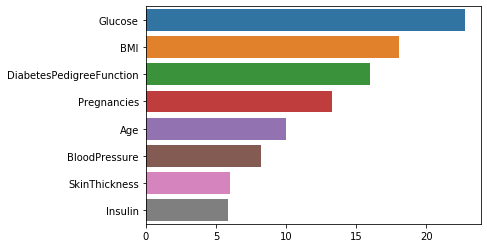

In [19]:
important = pd.Series(cat_tuned.feature_importances_, index = X_train.columns ).sort_values(ascending= False)
sns.barplot(x=important, y=important.index)